In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Load dataset

In [2]:
df = pd.read_csv('A_Z Handwritten Data.csv')

Split and reshape dataset

In [3]:
# labels: column '0', pixels: rest
x = df.drop('0', axis=1)
y = df['0']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

x_train = x_train.to_numpy().reshape(-1, 28, 28, 1)
x_test = x_test.to_numpy().reshape(-1, 28, 28, 1)

y_train = keras.utils.to_categorical(y_train, 26)
y_test = keras.utils.to_categorical(y_test, 26)

Plotting the number of alphabets in the dataset

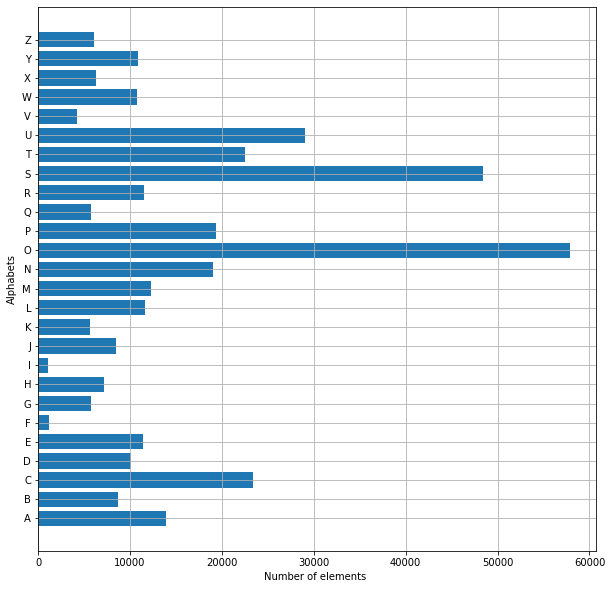

In [4]:
word_dict = {
    0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',
    6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',
    12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',
    18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'
}

y_int = np.int64(y)
labels_count = np.zeros(26, dtype='int')
for i in y_int:
    labels_count[i] +=1
alphabets = []
for i in word_dict.values():
    alphabets.append(i)
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, labels_count)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

Build model

In [5]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding = 'same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding = 'valid'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(64, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(26, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

Compile and train the model

In [6]:
batch_size = 100
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/5
2384/2384 [==============================] - 195s 80ms/step - loss: 0.4363 - accuracy: 0.8853 - val_loss: 0.0887 - val_accuracy: 0.9742
Epoch 2/5
2384/2384 [==============================] - 153s 64ms/step - loss: 0.1257 - accuracy: 0.9639 - val_loss: 0.0612 - val_accuracy: 0.9825
Epoch 3/5
2384/2384 [==============================] - 140s 59ms/step - loss: 0.1001 - accuracy: 0.9712 - val_loss: 0.0575 - val_accuracy: 0.9833
Epoch 4/5
2384/2384 [==============================] - 118s 49ms/step - loss: 0.0856 - accuracy: 0.9754 - val_loss: 0.0509 - val_accuracy: 0.9857
Epoch 5/5
2384/2384 [==============================] - 126s 53ms/step - loss: 0.0767 - accuracy: 0.9778 - val_loss: 0.0472 - val_accuracy: 0.9877


Evalute the model

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
score

[0.04772806540131569, 0.9870452284812927]

In [8]:
model.save('HandwrittenLetterRecohnition.h5')

Test the model by a specific case

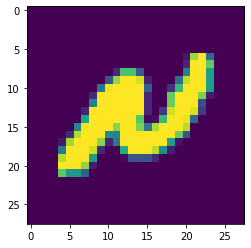

In [9]:
test_id = 20
plt.imshow(x_test[test_id])

In [10]:
result = np.argmax(model.predict(x_test[test_id].reshape(1,28,28,1)))
word_dict[result]

'N'